In [1]:
import torch 
from DataLoader import *
from imports import *
lpath = '../Data/labels.bin'
dpath = '../Data/data.bin'
batch_sz = 200
dl = DataLoader(lpath, dpath, batch_sz)
gen_d = dl.get_batch()
print('loaded data')

loaded data


In [2]:
model = Model()
model.addLayer(Linear(108*108, 2000))
model.addLayer(ReLU())
model.addLayer(Linear(2000, 200))
model.addLayer(ReLU())
model.addLayer(Linear(200, 50))
model.addLayer(ReLU())
model.addLayer(Linear(50,6))

In [3]:
lossClass = Criterion()
learningRate = 3e-5

In [9]:
def train(iterations, whenToPrint):
    print('training started...')
    global learningRate
    global model, gen_d, dl
    for i in range(iterations):
        # indices = (torch.randperm(dataSize)[:batchSize]).numpy()
        # currentData = data[indices, :]
        # currentLabels = labels.view(dataSize, 1)[indices, :]

        currentData, currentLabels = next(gen_d)
        #print('dbg1')
        #print(currentData)
        yPred = model.forward(currentData)
        #print(yPred)
        lossGrad, loss = lossClass.backward(yPred, currentLabels)
        #print(lossGrad, loss)
        if i%whenToPrint == 0:
            print(i, loss)
            #losses.append(loss)
            #plotIndices.append(plotIndex)
        model.clearGradParam()
        model.backward(currentData, lossGrad)
        for layer in model.Layers:
            if layer.isTrainable:
                layer.weight -= learningRate*layer.gradWeight
                layer.bias -= learningRate*layer.gradBias
        #plotIndex += 1

train(10, 3)

training started...
0 2.3911156107485296
3 2.3335040959715845
6 2.4959164690598845
9 2.3752664911746977


In [7]:
from Trainer import *
trainer = Trainer(model, dl, gen_d)
trainer.train(n_epoch=10, n_iter=30, rec_interval=3, step_interval=2, l_rate=learningRate, lossClass=lossClass)

trainer initialised
===========> starting epoch: 0, validation_accuracy:0.17, training_accuracy:0.176

epoch:0, iter:0, loss:2.925842607393861
epoch:0, iter:3, loss:2.787736643217504
epoch:0, iter:6, loss:2.762809507455677
epoch:0, iter:9, loss:2.6576247408613565
epoch:0, iter:12, loss:2.6845895195752383
epoch:0, iter:15, loss:2.6638384978612883
epoch:0, iter:18, loss:2.9065154745988546
epoch:0, iter:21, loss:3.024130993038416
epoch:0, iter:24, loss:2.8154935830459
epoch:0, iter:27, loss:2.8689621326327326
===========> starting epoch: 1, validation_accuracy:0.167, training_accuracy:0.177

epoch:1, iter:0, loss:2.759216454178095
epoch:1, iter:3, loss:2.843825200796127
epoch:1, iter:6, loss:2.846572382338345
epoch:1, iter:9, loss:2.65697804722935
epoch:1, iter:12, loss:2.6983076307177543
epoch:1, iter:15, loss:2.699804811179638
epoch:1, iter:18, loss:2.7943313527479767
epoch:1, iter:21, loss:2.793525220826268
epoch:1, iter:24, loss:2.7464169120974837
epoch:1, iter:27, loss:2.655991964004

In [5]:
trainer.training_accuracy()

0.15000000000000002

In [6]:
trainer.validation_accuracy()

0.146

In [8]:
trainer.step_record

[0, 2, 4, 6, 8]

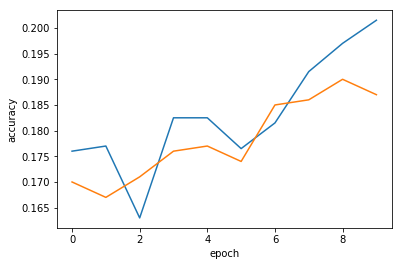

In [8]:
trainer.plot_accuracy()

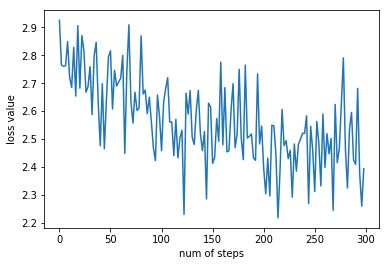

In [9]:
trainer.plot_loss()

In [10]:
a = torch.rand(3,5)
a


 0.9201  0.5977  0.9020  0.6892  0.8835
 0.1955  0.8463  0.2767  0.4723  0.4448
 0.7078  0.7318  0.9934  0.1443  0.6772
[torch.FloatTensor of size 3x5]

In [13]:
b = torch.zeros(a.size())
b


 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
[torch.FloatTensor of size 3x5]

In [15]:
velocity_wt = {}
velocity_b = {}
for lid,lyr in enumerate(model.Layers):
    if lyr.isTrainable:
        velocity_wt[lid] = torch.zeros(lyr.gradWeight.size())
        velocity_b[lid] = torch.zeros(lyr.gradBias.size())

In [18]:
velocity_wt[0]*3


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 11664x200]

In [6]:
from Trainer import *
trainer = Trainer(model, dl, gen_d)
trainer.train(n_epoch=50, n_iter=600, rec_interval=100, step_interval=10, l_rate=learningRate, beta=0.9, lossClass=lossClass)

trainer initialised
===========> starting epoch: 0, validation_accuracy:0.227, training_accuracy:0.22700000000000004

epoch:0, iter:0, loss:2.1645967166870834
epoch:0, iter:100, loss:2.151938086040318
epoch:0, iter:200, loss:2.287966046631336
epoch:0, iter:300, loss:2.2603009623568506
epoch:0, iter:400, loss:2.2568179550394416
epoch:0, iter:500, loss:2.3388160076737403
===========> starting epoch: 1, validation_accuracy:0.256, training_accuracy:0.26349999999999996

epoch:1, iter:0, loss:2.1906064789742232
epoch:1, iter:100, loss:2.097672536149621
epoch:1, iter:200, loss:2.1283153101988135
epoch:1, iter:300, loss:1.9383144713914953
epoch:1, iter:400, loss:2.057082365350798
epoch:1, iter:500, loss:2.026173432350624
===========> starting epoch: 2, validation_accuracy:0.292, training_accuracy:0.296

epoch:2, iter:0, loss:2.0871374878659843
epoch:2, iter:100, loss:1.946217915196903
epoch:2, iter:200, loss:1.9860446188179777
epoch:2, iter:300, loss:1.8911981813795864
epoch:2, iter:400, loss:

epoch:23, iter:200, loss:14.46023458480835
epoch:23, iter:300, loss:14.644441394805908
epoch:23, iter:400, loss:15.65757884979248
epoch:23, iter:500, loss:15.933889064788819
===========> starting epoch: 24, validation_accuracy:0.155, training_accuracy:0.16849999999999998

epoch:24, iter:0, loss:15.933889064788819
epoch:24, iter:100, loss:15.565475444793702
epoch:24, iter:200, loss:16.025992469787596
epoch:24, iter:300, loss:15.65757884979248
epoch:24, iter:400, loss:16.302302684783935
epoch:24, iter:500, loss:15.609413866996766
===========> starting epoch: 25, validation_accuracy:0.156, training_accuracy:0.177

epoch:25, iter:0, loss:16.025992469787596
epoch:25, iter:100, loss:16.210199279785158
epoch:25, iter:200, loss:14.644441394805908
epoch:25, iter:300, loss:14.46023458480835
epoch:25, iter:400, loss:15.197061824798585
epoch:25, iter:500, loss:15.289165229797364
===========> starting epoch: 26, validation_accuracy:0.183, training_accuracy:0.1665

epoch:26, iter:0, loss:14.46023458

===========> starting epoch: 47, validation_accuracy:0.159, training_accuracy:0.173

epoch:47, iter:0, loss:14.828648204803466
epoch:47, iter:100, loss:15.225067999362945
epoch:47, iter:200, loss:15.74968225479126
epoch:47, iter:300, loss:15.104958419799805
epoch:47, iter:400, loss:14.736544799804687
epoch:47, iter:500, loss:15.197061824798585
===========> starting epoch: 48, validation_accuracy:0.159, training_accuracy:0.179

epoch:48, iter:0, loss:15.381268634796143
epoch:48, iter:100, loss:15.381268634796143
epoch:48, iter:200, loss:14.828648204803466
epoch:48, iter:300, loss:14.46023458480835
epoch:48, iter:400, loss:15.289165229797364
epoch:48, iter:500, loss:15.012855014801026
===========> starting epoch: 49, validation_accuracy:0.183, training_accuracy:0.1735

epoch:49, iter:0, loss:14.36813117980957
epoch:49, iter:100, loss:15.104958419799805
epoch:49, iter:200, loss:14.657412178516388
epoch:49, iter:300, loss:15.289165229797364
epoch:49, iter:400, loss:15.65757884979248
epoch:

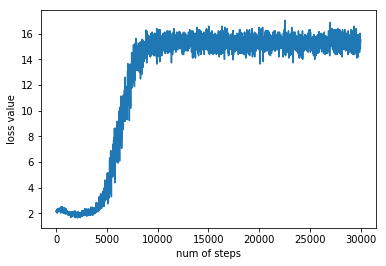

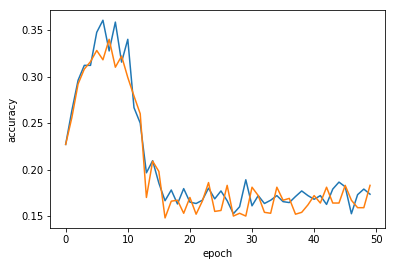

In [7]:
trainer.plot_loss()
trainer.plot_accuracy()

In [4]:
from Trainer import *
trainer = Trainer(model, dl, gen_d)
trainer.train(n_epoch=5, n_iter=600, rec_interval=20, step_interval=10, l_rate=learningRate, beta=0.9, lossClass=lossClass)

trainer initialised
===========> starting epoch: 0, validation_accuracy:0.169, training_accuracy:0.17149999999999999

epoch:0, iter:0, loss:2.9829770695231854
epoch:0, iter:20, loss:2.9280049504712222
epoch:0, iter:40, loss:3.0006547363474967
epoch:0, iter:60, loss:2.732209058329463
epoch:0, iter:80, loss:2.6536909620836377
epoch:0, iter:100, loss:2.6884864721260966
epoch:0, iter:120, loss:2.815275266971439
epoch:0, iter:140, loss:2.661918316502124
epoch:0, iter:160, loss:2.6345135301584377
epoch:0, iter:180, loss:2.6025723435077817
epoch:0, iter:200, loss:2.583604699764401
epoch:0, iter:220, loss:2.573067884109914
epoch:0, iter:240, loss:2.582621548580937
epoch:0, iter:260, loss:2.648146642562933
epoch:0, iter:280, loss:2.657385049685836
epoch:0, iter:300, loss:2.5901872115954756
epoch:0, iter:320, loss:2.5138907266035675
epoch:0, iter:340, loss:2.6883696054667237
epoch:0, iter:360, loss:2.5000436672521755
epoch:0, iter:380, loss:2.503134225239046
epoch:0, iter:400, loss:2.55186583422